
    Page 161: 12-1 (The linear model I used in this chapter has the obvious drawback that it is linear and there is no reason to expect prices to change linearly over time…)
    Page 161: 12-2 (Write a definition for a class called SerialCorrelationTest that extends HypothesisTest from “HypothesisTest” on page 102…)


# Stoneburner, Kurt
- ## DSC 530 - Week 10

In [1]:
# //****************************************************************************************
# //*** Set Working Directory to thinkstats folder.
# //*** This pseudo-relative path call should work on all Stoneburner localized projects. 
# //****************************************************************************************

import os
import sys
workingPath = os.getcwd().replace("coding", "ThinkStats2\\code")
sys.path.insert(1, workingPath)
os.chdir(workingPath)

In [2]:
# //*** Imports and Load Data
#import nsfg
import thinkstats2
import thinkplot
#import first
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

transactions = pd.read_csv('mj-clean.csv', parse_dates=[5])
#//*** Add an index field that matches the index to help with reindexing errors
transactions['dex'] = transactions.index

#//*** Build empty array to hold average daily price 
mt_arr=np.empty(len(transactions));mt_arr.fill(np.nan)
#transactions['ppg_avg_day'] = mt_arr


transactions.head()

,city,state,price,amount,quality,date,ppg,state.name,lat,lon,dex
0,Annandale,VA,100,7.075,high,2010-09-02,14.13,Virginia,38.830345,-77.213870,0
1,Auburn,AL,60,28.300,high,2010-09-02,2.12,Alabama,32.578185,-85.472820,1
2,Austin,TX,60,28.300,medium,2010-09-02,2.12,Texas,30.326374,-97.771258,2
3,Belleville,IL,400,28.300,high,2010-09-02,14.13,Illinois,38.532311,-89.983521,3
4,Boone,NC,55,3.540,high,2010-09-02,15.54,North Carolina,36.217052,-81.687983,4


In [16]:
#//*********************************************************************
#//*** Quick regression model results using patsy formula.
#//*********************************************************************
#//*** input_dict kwargs:
#//*** summary (boolean) - Display a summary evaluation of the model
#//*** pval (boolean) - Display the p-value of the model
#//*** getrsquared (boolean) - returns the r**2 value of the model
#//*** getpvalue (boolean) - returns the p value of the model
#//*** getmodel (boolean) - returns the model
#//*** method (string) - model type to run
#//***       ols (default) - Ordinary Least Squares (linear regression)
#//***       poisson - Poisson regression
#//***       logit - logistic regression.
#//*** Single output are returned as a single tyoe
#//*** Multiple outots return as a string in the following order: rsquared, pvalue, model
#//*****************************************************************************************
def qmodel_patsy_ols(df,formula,**input_dict):
    
    #//*** Check that Statsmodel is loaded.
    #//*** Requires the sys library which imports if not in use.
    try:
        if 'sys' not in sys.modules:
            print(f"{sys.modules}")
        else:
            import sys
    except:
        import sys

    if 'sm' not in sys.modules:
        try:
            import statsmodels.api as sm
        except:
            print(f"This Function requires the 'statsmodel' library to be installed")
            return
    if 'sm' not in sys.modules:
        try:
            import statsmodels.formula.api as smf
        except:
            print(f"This Function requires the 'statsmodel' library to be installed")
            return

    output = []
    display_summary = False
    display_pval = False
    getpvalue = False
    getrsquared = False
    getmodel = False
    method = "ols"
    generalError = False
    
    for key,value in input_dict.items():
        if key == 'summary':
            display_summary = value
        if key == 'pvalue':
            display_pval = value
        if key == 'getpvalue':
            getpvalue = value
        if key == 'getrsquared':
            getrsquared = value
        if key == 'method':
            method = value
        if key == 'getmodel':
            getmodel = value
        if key == 'getresults':
            getresults = value

    if method == "ols":
        model = smf.ols(formula=formula, data=df)
        results = model.fit()
    elif method == "poisson":
        model = smf.poisson(formula, data=join).fit()
        results = model.fit()
    elif method == "logit":
        try:
            #model = smf.logit(formula, data=df).fit()
            model = smf.logit(formula, data=df)
            
            #//*** Endogenous variables designates variables in an economic/econometric model that are explained, or predicted, by that mode
            #//*** Test for endogenous variables. If less than half the variables are explained by the model, reject the model.
            nobs = len(model.endog)
            
            if nobs < len(df)/2:
                generalError = True
            else:
                results = model.fit()
                results = model.fit()

        except:
            generalError = True
    else:
        print(f"Provide a valid Method:\n method='ols' [default]\nmethod='logit'")
        return
    # //*** On an error return 999 for all requested values
    if generalError:
        if getrsquared:
            output.append(999)

        if getpvalue:
            output.append(pd.Series(data=[999]))
        
        return output
        
    #//**** Display Methods
    if display_summary:
        print("==========================")
        print("Q model Quick Display")
        print("==========================")
        print_model = results.summary()
        print(f"{print_model}")
    if display_pval:
        print("==========================")
        print("Q model P Values")
        print("==========================")
        results.pvalues.drop(['Intercept'])
        for x,y in results.pvalues.items():
            if x != 'Intercept':
                print(f"{x} : {y}")

    #//**** Return Methods            
    if getmodel:
        output.append(model)
    if getresults:
        output.append(results)

    if getrsquared:
        if method == "logit":
            output.append(results.prsquared)
        else:
            output.append(results.rsquared)
    
    if getpvalue:
        try:
            output.append(results.pvalues.drop(index='Intercept') )
        except:
            output.append(results.pvalues.values)
    

    #//*** If more than one output variable, output a list
    if len(output) > 1:
        return output
    elif len(output) == 1:
        #//*** Single elements, just return the element
        return output[0]
        
        
        

- ## Chapter 12, Exercise 1

**Exercise:**   The linear model I used in this chapter has the obvious drawback that it is linear, and there is no reason to expect prices to change linearly over time. We can add flexibility to the model by adding a quadratic term, as we did in Section 11.3.

Use a quadratic model to fit the time series of daily prices, and use the model to generate predictions. You will have to write a version of `RunLinearModel` that runs that quadratic model, but after that you should be able to reuse code from the chapter to generate predictions.

In [7]:
#//*** Combine the data for each day and group by quality (high, med, low)
mt_arr=np.empty(len(transactions));mt_arr.fill(np.nan)

#ppg_avg_day = pd.Series(mt_arr)
#year_part = pd.Series(mt_arr)

avg_ppg_dict = {}
year_part_dict = {}

#//*** Base values to calculate time of year
start_date = transactions['date'][0]
one_year = np.timedelta64(1, 'Y')

#//*** Divide groups by Quality
for quality_group in transactions.groupby('quality'):
    print(f"Processing Group: - {quality_group[0]}")
    
    #//*** group quality_group_df by date
    for each_day in quality_group[1].groupby('date'):
        
        #//*** Generate the mean of all values on a given day
        each_day_mean = np.mean(each_day[1]['ppg'])
        
        #//*** Get the date as a percentage of the current year
        loop_date = (each_day[1]['date'].iloc[0] - start_date) / one_year
    
        #//*** Update ppg_avg_day series
        #//*** Use the 'dex' as index 
        #//*** Put results in a dictionary, it's faster than working with a Series
        for loop2_index in each_day[1]['dex']:
            avg_ppg_dict[loop2_index] = each_day_mean
            year_part_dict[loop2_index] = loop_date

#//*** Convert dict to list            
index = sorted(avg_ppg_dict.keys())
ppg_avg_day = []
year_part = []
for i in index:
    #print(avg_ppg_dict[i])
    ppg_avg_day.append( avg_ppg_dict[i] )
    year_part.append(year_part_dict[i] )

#//*** Add Lists to dataframe
transactions['ppg_avg_day'] = ppg_avg_day
transactions['year_part'] = year_part
#//*** Add Weighted year parts
transactions['year_part2'] = transactions['year_part']**2

            

print(f"{transactions.tail()}")

Processing Group: - high
Processing Group: - low
Processing Group: - medium
                   city state  price  amount quality       date    ppg  \
147065  West Palm Beach    FL    140   28.30    high 2014-05-13   4.95   
147066       Wilmington    OH     30    3.54  medium 2014-05-13   8.47   
147067       Youngstown    OH    100   10.00  medium 2014-05-13  10.00   
147068        Ypsilanti    MI     35    3.54  medium 2014-05-13   9.89   
147069             Yuma    AZ     20    3.54  medium 2014-05-13   5.65   

       state.name        lat         lon     dex  ppg_avg_day  year_part  \
147065    Florida  26.669744  -80.127040  147065     9.604615   3.693437   
147066       Ohio  39.463476  -83.844460  147066     9.810625   3.693437   
147067       Ohio  41.086279  -80.664670  147067     9.810625   3.693437   
147068   Michigan  42.235260  -83.607655  147068     9.810625   3.693437   
147069    Arizona  32.700018 -114.526710  147069     9.810625   3.693437   

        year_part2  
1

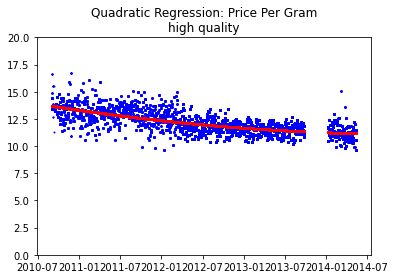

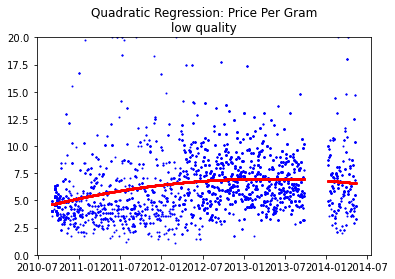

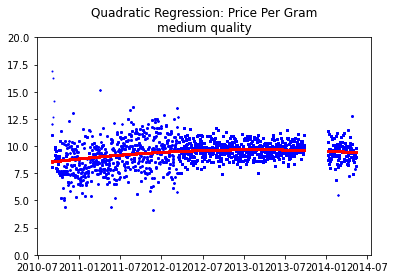

In [41]:
#//Plot Quadratic Regression
for group in transactions.groupby('quality'):
    name=group[0]
    group = group[1]
    results = qmodel_patsy_ols( group,"ppg_avg_day ~ year_part + year_part2",summary=False,method="ols",getresults=True)
    #print(f"{ thisModel.predict() }")
    #print(f"{group['date'].min()} {group['date'].max()} - {group['date'].max() - group['date'].min()}" )
    labels = ['ppg','predict']
    plt.scatter(group['date'],group['ppg_avg_day'],1,'b',label=labels[0])
    plt.scatter( group['date'],results.predict(),1,'red',label=labels[1] )
    plt.legend=labels
    plt.title(f"Quadratic Regression: Price Per Gram\n{name} quality")
    plt.ylim(0,20)
    plt.show()

    

In [215]:
#//Plot Quadratic Regression
labels= []
#fig,ax = plt.subplots()
for group in transactions.groupby('quality'):
    name=group[0]
    group = group[1]
    results = qmodel_patsy_ols( group,"ppg_avg_day ~ year_part + year_part2",summary=False,method="ols", getresults=True)
    
    
    
    #//*** Generate future prediction based on prediction slope.
    
    #//*** Generate an evenly spaced array from 0-5 to simulate # of Years. Fill with 12*5=60 representing a predicted 
    #//*** price per month 
    years = np.linspace(0, 5, int( len(group)/4)) 

    #//*** Create empty intercept array, same length as years
    inter = np.ones(len(years))

    #//*** Create a dictionary:
    #//*** Inter: Array of ones
    #//*** Years - Evenly spaced array from 0-5
    #//*** Years2 - exponent of Years.
    d = dict(Intercept=inter, year_part=years, year_part2=years**2)
    
    #//*** Convert dictionary to DataFrame
    predict_df = pd.DataFrame(d)

    predict_df['predict'] = results.predict(predict_df)
    
    predict_df['residuals'] = results.resid
    predict_df['residuals'] = predict_df['residuals'].replace(np.nan,0)
    #//*** Randomize / Resample the Residuals & add to existing Predictions
    predict_df['random_residuals'] = np.random.choice(predict_df['residuals'],len(years))
    predict_df['random_predictions'] = predict_df['random_residuals'] + predict_df['predict']
    
    
    print(f"{results.predict(predict_df['random_predictions'])}")
    
    
    minY = predict_df['random_residuals'].min()
    maxY = predict_df['random_residuals'].max()
    
    labels.append(name)
    #plt.scatter(group['date'],group['ppg_avg_day'],1,'b')
    plt.plot( predict_df['year_part'], predict_df['predict'],1,color='red',label=name )
    #plt.ylim(0,20)
    
    plt.scatter( predict_df['year_part'], predict_df['random_predictions'],1,color='blue',label=name )
    
#plt.legend(labels)
    plt.title(f"Quadratic Prediction: Price Per Gram\n{name} quality")
    plt.show()
    

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Number of rows mismatch between data argument and year_part (1 versus 147070)
    ppg_avg_day ~ year_part + year_part2
                  ^^^^^^^^^

In [ ]:
#qmodel_patsy_ols(transactions,"ppg_avg_day ~ year_part")


- ## Chapter 12, Exercise 2

**Exercise:** Write a definition for a class named `SerialCorrelationTest` that extends `HypothesisTest` from Section 9.2. It should take a series and a lag as data, compute the serial correlation of the series with the given lag, and then compute the p-value of the observed correlation.

Use this class to test whether the serial correlation in raw price data is statistically significant. Also test the residuals of the linear model and (if you did the previous exercise), the quadratic model.



In [ ]:
# //*** CODE HERE

- ## Chapter X, Exercise X



In [ ]:
# //*** CODE HERE

- ## Chapter X, Exercise X



In [ ]:
# //*** CODE HERE